In [337]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [338]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rock_paper_scissors.zip

--2020-06-28 01:46:58--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rock_paper_scissors.zip’

/tmp/rock_paper_sci 100%[===================>] 307.92M  24.5MB/s    in 13s     

2020-06-28 01:47:12 (23.0 MB/s) - ‘/tmp/rock_paper_scissors.zip’ saved [322873683/322873683]



In [339]:
import zipfile,os
local_zip = '/tmp/rock_paper_scissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
#ekstra dataset file zip ke destinasi /tmp
zip_ref.extractall('/tmp')
zip_ref.close()

#hapus file readme yang tidak dibutuhkan utk dataset
os.remove("/tmp/rockpaperscissors/rps-cv-images/README_rpc-cv-images.txt")
os.remove("/tmp/rockpaperscissors/README_rpc-cv-images.txt")
base_dir = '/tmp/rockpaperscissors'

#lihat base_dir dan buat folder dataset_dir
os.listdir(base_dir)
dataset_dir = os.path.join(base_dir, 'rps-cv-images')

In [340]:
file_name = []
tag = []
full_path = []
for path, subdirs, files in os.walk(dataset_dir):
    for name in files:
        full_path.append(os.path.join(path, name)) 
        tag.append(path.split('/')[-1])        
        file_name.append(name)
                         
import pandas as pd
df = pd.DataFrame({"path":full_path,'file_name':file_name,"tag":tag})
df.groupby(['tag']).size()

tag
paper       712
rock        726
scissors    750
dtype: int64

In [341]:
df.head(3)

,path,file_name,tag
0,/tmp/rockpaperscissors/rps-cv-images/paper/UCZ...,UCZlOkcylNYU2ylP.png,paper
1,/tmp/rockpaperscissors/rps-cv-images/paper/Qbn...,Qbn4RJqessetWPHR.png,paper
2,/tmp/rockpaperscissors/rps-cv-images/paper/rDf...,rDfjA9TE0tYqzT21.png,paper


In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2188 entries, 0 to 2187
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   path       2188 non-null   object
 1   file_name  2188 non-null   object
 2   tag        2188 non-null   object
dtypes: object(3)
memory usage: 51.4+ KB


In [343]:
from sklearn.model_selection import train_test_split
X= df['path']
y= df['tag']

#bagi dataset menjadi 2 yakni dataset validation dan dataset training
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.20, random_state=0)

In [344]:
df_tr = pd.DataFrame({'path':X_train
              ,'tag':y_train
             ,'set':'train'})

df_val = pd.DataFrame({'path':X_val
              ,'tag':y_val
             ,'set':'validation'})

In [345]:
#cetak banyak data train dan data validation
print('train size', len(df_tr))
print('val size', len(df_val))

train size 1750
val size 438


In [346]:
# melihat proporsi pada masing masing set apakah sudah ok atau masih ada yang ingin diubah
df_all = df_tr.append([df_tr,df_val]).reset_index(drop=1)\

#cetak dataframe df_all gabungan dari df_tr, df_val
print(df_all.groupby(['set','tag']).size(),'\n')

#mengecek sample data
df_all.sample(3)

set         tag     
train       paper       1120
            rock        1162
            scissors    1218
validation  paper        152
            rock         145
            scissors     141
dtype: int64 



,path,tag,set
2026,/tmp/rockpaperscissors/rps-cv-images/paper/QUc...,paper,train
556,/tmp/rockpaperscissors/rps-cv-images/rock/EvpZ...,rock,train
3320,/tmp/rockpaperscissors/rps-cv-images/scissors/...,scissors,train


In [347]:
import shutil
from tqdm.notebook import tqdm as tq

In [348]:
datasource_path = "tmp/rockpaperscissors/rps-cv-images"
dataset_path = "dataset/tr"
for index, row in tq(df_tr.iterrows()):
    
    file_path = row['path']
    if os.path.exists(file_path) == False:
            file_path = os.path.join(datasource_path,row['tag'],row['image'].split('.')[0])            
    
    if os.path.exists(os.path.join(dataset_path,row['set'],row['tag'])) == False:
        os.makedirs(os.path.join(dataset_path,row['set'],row['tag']))
    
    destination_file_name = file_path.split('/')[-1]
    file_dest = os.path.join(dataset_path,row['set'],row['tag'],destination_file_name)
    
    if os.path.exists(file_dest) == False:
        shutil.copy2(file_path,file_dest)

In [349]:
datasource_path = "tmp/rockpaperscissors/rps-cv-images"
dataset_path = "dataset/val"
for index, row in tq(df_val.iterrows()):
    
    file_path = row['path']
    if os.path.exists(file_path) == False:
            file_path = os.path.join(datasource_path,row['tag'],row['image'].split('.')[0])            
    
    if os.path.exists(os.path.join(dataset_path,row['set'],row['tag'])) == False:
        os.makedirs(os.path.join(dataset_path,row['set'],row['tag']))
    
    destination_file_name = file_path.split('/')[-1]
    file_dest = os.path.join(dataset_path,row['set'],row['tag'],destination_file_name)
    
    if os.path.exists(file_dest) == False:
        shutil.copy2(file_path,file_dest)

In [350]:
os.listdir('dataset/tr/train')

['paper', 'rock', 'scissors']

In [351]:
os.listdir('dataset/val/validation')

['paper', 'rock', 'scissors']

In [352]:
#buat image data generator untuk dataset training 
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

#buat image data generator untuk dataset validation
val_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [353]:
train_generator = train_datagen.flow_from_directory(
        'dataset/tr/train/',  
        target_size=(150, 150), 
        batch_size=4,
        class_mode='categorical') #gunakan categorical untuk 3 kelas data pada dataset training

validation_generator = val_datagen.flow_from_directory(
        'dataset/val/validation/', 
        target_size=(150, 150), 
        batch_size=4, 
        class_mode='categorical') #gunakan categorical untuk 3 kelas data pada dataset validation

Found 1750 images belonging to 3 classes.
Found 438 images belonging to 3 classes.


In [354]:
#buat model sequential
model = tf.keras.models.Sequential([
    #buat masing-masing 4 layer konvolusi, 4 layer maxpooling                                    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #buat 1 inputan flatten
    tf.keras.layers.Flatten(),
    #buat 2 hidden layer dense
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    #buat 1 output dense dengan aktivasi softmax
    tf.keras.layers.Dense(3, activation='softmax')
])

In [355]:
#compile model
model.compile(loss='categorical_crossentropy', #gunakan loss categorical_crossentropy untuk 3 kelas atau lebih
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])


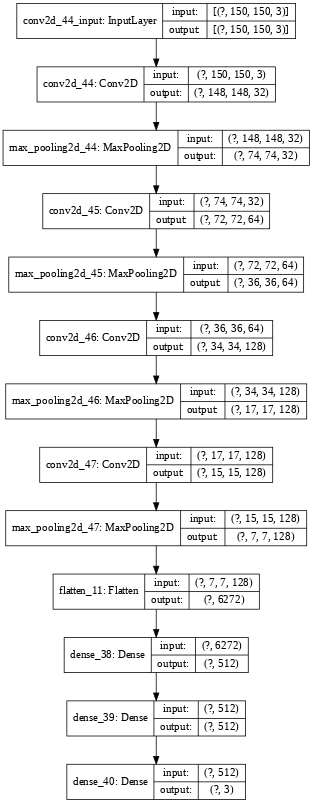

In [356]:
#buat visualisasi model
model_visual = tf.keras.utils.plot_model(model,
                          to_file='model.png',
                          show_shapes=True,
                          show_layer_names=True,
                          rankdir='TB',
                          expand_nested=True,
                          dpi=55)
model_visual

In [357]:
#buat ringkasan model
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 15, 15, 128)     

In [358]:
#lakukan training data
model.fit(
   train_generator,
   steps_per_epoch = 50, 
   epochs = 30,
   validation_data = validation_generator, 
   validation_steps = 50,  
   verbose = 2)

Epoch 1/30
50/50 - 15s - loss: 1.1041 - accuracy: 0.4300 - val_loss: 1.1009 - val_accuracy: 0.3400
Epoch 2/30
50/50 - 15s - loss: 1.1083 - accuracy: 0.3586 - val_loss: 1.0998 - val_accuracy: 0.3100
Epoch 3/30
50/50 - 15s - loss: 1.0971 - accuracy: 0.3550 - val_loss: 1.0856 - val_accuracy: 0.3450
Epoch 4/30
50/50 - 15s - loss: 1.0821 - accuracy: 0.3650 - val_loss: 1.0293 - val_accuracy: 0.5050
Epoch 5/30
50/50 - 15s - loss: 0.9804 - accuracy: 0.5200 - val_loss: 1.0903 - val_accuracy: 0.3250
Epoch 6/30
50/50 - 15s - loss: 0.8974 - accuracy: 0.5950 - val_loss: 0.7694 - val_accuracy: 0.6400
Epoch 7/30
50/50 - 15s - loss: 0.6571 - accuracy: 0.7828 - val_loss: 0.4426 - val_accuracy: 0.8500
Epoch 8/30
50/50 - 15s - loss: 0.4447 - accuracy: 0.8650 - val_loss: 0.5059 - val_accuracy: 0.8100
Epoch 9/30
50/50 - 15s - loss: 0.3590 - accuracy: 0.8650 - val_loss: 0.3455 - val_accuracy: 0.8800
Epoch 10/30
50/50 - 15s - loss: 0.3028 - accuracy: 0.9150 - val_loss: 0.3410 - val_accuracy: 0.8900
Epoch 11/

In [359]:
#hitung evaluasi akurasi dan loss training model
loss, acc = model.evaluate(train_generator, steps=len(train_generator), verbose=0)
print('Akurasi train data: {:.4f}\n Loss train data: {:.4f}'.format(acc,loss),'\n')

#hitung evaluasi akurasi dan loss validation model 
loss, acc = model.evaluate(validation_generator, steps=len(validation_generator), verbose=0)
print('Akurasi validation data: {:.4f}\n Loss validation data: {:.4f}'.format(acc,loss),'\n')

Akurasi train data: 0.9554
 Loss train data: 0.1118 

Akurasi validation data: 0.9521
 Loss validation data: 0.1513 



In [360]:
#hitung banyak kelas dataset validation dan dataset training
num_val_class = validation_generator.num_classes
num_train_class = train_generator.num_classes
print('number validation classes: ', num_class)
print('number train classes: ', num_class)

#lihat label kelas dataset validation dan dataset training
label_train = train_generator.class_indices.keys()
label_val = validation_generator.class_indices.keys()
print('label train classes: ', label_train)
print('label validation classes: ', label_val)

number validation classes:  3
number train classes:  3
label train classes:  dict_keys(['paper', 'rock', 'scissors'])
label validation classes:  dict_keys(['paper', 'rock', 'scissors'])


Saving 2E8j595xseKRF60J.png to 2E8j595xseKRF60J.png
scissors


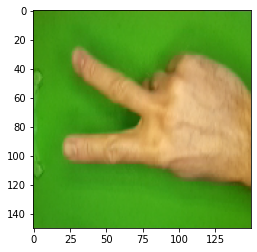

In [368]:
#buat fungsi prediksi untuk mengetes model 
import requests
from io import BytesIO
from PIL import Image
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

input_size = (150, 150)
channel = (3,)
input_shape = input_size + channel
labels = ['paper', 'rock', 'scissors']

uploaded = files.upload()
for fn in uploaded.keys(): 
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print( labels[np.argmax(classes)] )